In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0665 - acc: 0.0089 - val_loss: 0.0464 - val_acc: 0.0143
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0368 - acc: 0.0148 - val_loss: 0.0291 - val_acc: 0.0131
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0261 - acc: 0.0110 - val_loss: 0.0227 - val_acc: 0.0088
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0213 - acc: 0.0104 - val_loss: 0.0192 - val_acc: 0.0079
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0186 - acc: 0.0100 - val_loss: 0.0172 - val_acc: 0.0091
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0170 - acc: 0.0109 - val_loss: 0.0160 - val_acc: 0.0112
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0160 - acc: 0.0112 - val_loss: 0.0152 - val_acc

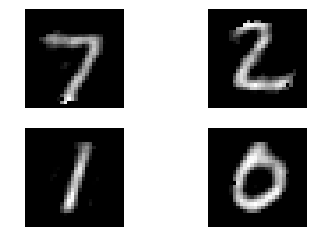

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Multi-layer auto encoder

In [0]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               79184     
Total params: 164,216
Trainable params: 164,216
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=25, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 20us/step - loss: 0.0667 - val_loss: 0.0456
Epoch 2/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0345 - val_loss: 0.0269
Epoch 3/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0245 - val_loss: 0.0220
Epoch 4/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0213 - val_loss: 0.0199
Epoch 5/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0196 - val_loss: 0.0185
Epoch 6/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0185 - val_loss: 0.0176
Epoch 7/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0177 - val_loss: 0.0169
Epoch 8/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0171 - val_loss: 0.0165
Epoch 9/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0167 - val_loss: 0.0162
Epoch

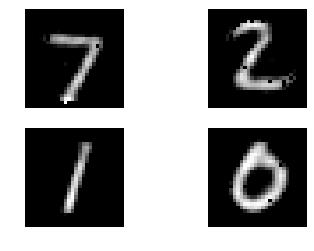

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Convolutional auto-encoder

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_train = X_train/255
X_test = X_test/255

In [0]:
from keras.layers.convolutional import UpSampling2D
from keras.layers import Reshape

In [0]:
from keras.layers import Conv2DTranspose

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(Conv2D(16, (3,3), activation='relu',padding='same',name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Conv2D(8, (3,3), activation='relu',padding='same',name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool3'))
model.add(Conv2D(32, (3,3), activation='relu',padding='same',name='conv4'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool4'))
model.add(Flatten(name='flatten'))
model.add(Reshape((1,1,32)))
model.add(Conv2DTranspose(8, kernel_size = (3,3), activation='relu'))
model.add(Conv2DTranspose(16, kernel_size = (5,5), activation='relu'))
model.add(Conv2DTranspose(32, kernel_size = (8,8), activation='relu'))
model.add(Conv2DTranspose(32, kernel_size = (15,15), activation='relu'))
model.add(Conv2D(1, (3, 3), activation='relu',padding='same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 16)        4624      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 8)           1160      
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 3, 3, 8)           0         
_________________________________________________________________
conv4 (Conv2D)               (None, 3, 3, 32)          2336      
__________

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0722 - val_loss: 0.0646
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0633 - val_loss: 0.0617
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0552 - val_loss: 0.0477
Epoch 4/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0432 - val_loss: 0.0392
Epoch 5/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0355 - val_loss: 0.0325
Epoch 6/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0311 - val_loss: 0.0288
Epoch 7/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0283 - val_loss: 0.0272
Epoch 8/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0264 - val_loss: 0.0248
Epoch 9/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0247 - val_loss: 0.

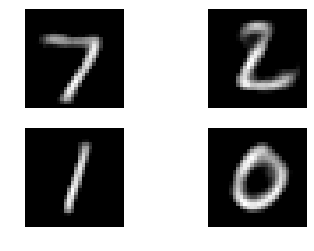

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.axis('off')
plt.imshow(model.predict(X_test[0,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.axis('off')
plt.imshow(model.predict(X_test[1,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.axis('off')
plt.imshow(model.predict(X_test[2,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.axis('off')
plt.imshow(model.predict(X_test[3,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

# Grouping similar images

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0671 - acc: 0.0068 - val_loss: 0.0460 - val_acc: 0.0099
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0373 - acc: 0.0093 - val_loss: 0.0304 - val_acc: 0.0113
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0273 - acc: 0.0095 - val_loss: 0.0240 - val_acc: 0.0110
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0224 - acc: 0.0096 - val_loss: 0.0203 - val_acc: 0.0101
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0195 - acc: 0.0107 - val_loss: 0.0180 - val_acc: 0.0116
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0177 - acc: 0.0112 - val_loss: 0.0167 - val_acc: 0.0095
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0166 - acc: 0.0118 - val_loss: 0.0159 - val_acc

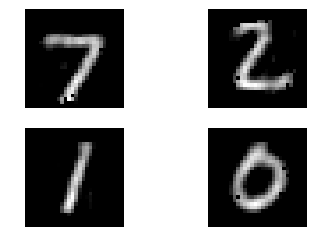

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

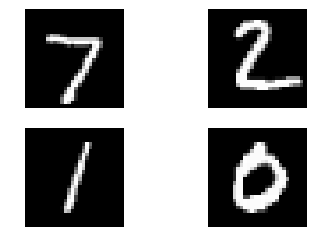

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow((X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow((X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow((X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow((X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

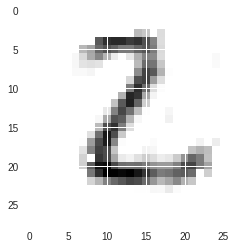

In [0]:
img=model.predict(X_test[1,:].reshape(1,784)).reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

In [0]:
!pip install bokeh

In [0]:
from keras.models import Model
layer_name = 'dense_11'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [0]:
intermediate_output = intermediate_layer_model.predict(X_test)

In [0]:
intermediate_output.shape

(10000, 32)

In [0]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [0]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

Loading BokehJS ...

In [0]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 6.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.022849
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.396210
[t-SNE] KL divergence after 1000 iterations: 1.810992


In [0]:
import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = y_test

In [0]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 13.9MB/s 


In [0]:
from ggplot import *

/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
chart = ggplot(tsne_df, aes(x='x', y='y', color='factor(image_label)'))+ geom_point(size=70,alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

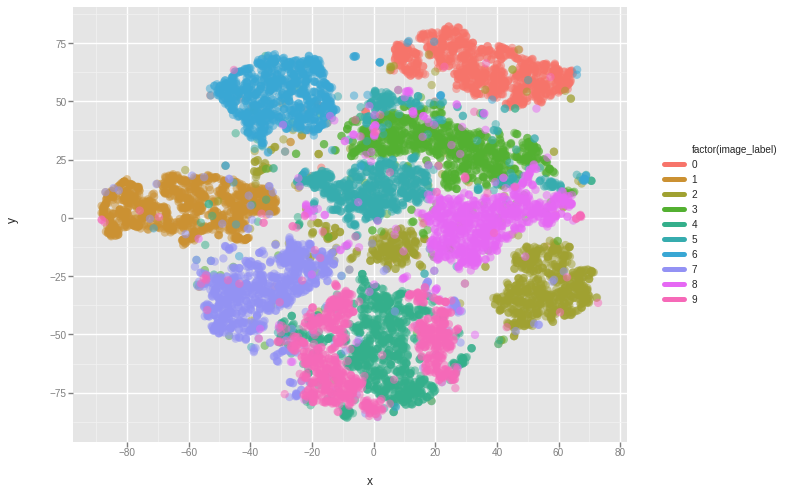

<ggplot: (-9223363275397849326)>

In [0]:
chart